In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/modified_lyrics.csv")

In [3]:
df.head()

,year,rank,title,artist,modified_title,modified_artist,lyrics
0,1946,1,"""Prisoner of Love""",Perry Como,Prisoner of Love,Perry Como,Alone from night to night you'll find me|Too w...
1,1946,2,"""To Each His Own""",Eddy Howard,To Each His Own,Eddy Howard,A rose must remain with the sun and the rain|O...
2,1946,3,"""The Gypsy""",The Ink Spots,The Gypsy,The Ink Spots,In a quaint caravan|There's a lady they call t...
3,1946,4,"""Five Minutes More""",Frank Sinatra,Five Minutes More,Frank Sinatra,"Dear, this evening seemed to go so awfully fas..."
4,1946,5,"""Rumors Are Flying""",Frankie Carle,Rumors Are Flying,Frankie Carle,Rumors are flying|That you've got me sighing|T...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             6989 non-null   int64 
 1   rank             6989 non-null   int64 
 2   title            6989 non-null   object
 3   artist           6989 non-null   object
 4   modified_title   6989 non-null   object
 5   modified_artist  6989 non-null   object
 6   lyrics           6989 non-null   object
dtypes: int64(2), object(5)
memory usage: 382.3+ KB


In [5]:
# the number of songs with no lyrics (such as instrumental music)
no_lyrics_cnt = len(df[df["lyrics"] == "no_lyrics"])

# the number of songs which were not found in Genius
no_results_cnt = len(df[df["lyrics"] == "no_results_found"])

# the number of songs with unreliable search result
unreliable_cnt = len(df[df["lyrics"] == "unreliable"])

total_cnt = len(df)
lyrics_cnt = total_cnt - (no_lyrics_cnt + no_results_cnt + unreliable_cnt)

print(f"total: {total_cnt}")
print(f" = {lyrics_cnt:>5} ({lyrics_cnt / total_cnt * 100:>5.2f}%): valid lyrics")
print(f"  +{no_lyrics_cnt:>5} ({no_lyrics_cnt / total_cnt * 100:>5.2f}%): no lyrics")
print(f"  +{no_results_cnt:>5} ({no_results_cnt / total_cnt * 100:>5.2f}%): no results")
print(f"  +{unreliable_cnt:>5} ({unreliable_cnt / total_cnt * 100:>5.2f}%): unreliable results")

total: 6989
 =  6690 (95.72%): valid lyrics
  +   84 ( 1.20%): no lyrics
  +   24 ( 0.34%): no results
  +  191 ( 2.73%): unreliable results


In [6]:
counts = []
ratios = []

for i in range(1946, 2024):
    total = len(df.query(f'year == {i}'))
    no_lyrics = len(df.query(f'year == {i} and lyrics == "no_lyrics"'))
    no_results = len(df.query(f'year == {i} and lyrics == "no_results_found"'))
    unreliable_results = len(df.query(f'year == {i} and lyrics == "unreliable"'))
    lyrics = total - (no_lyrics + no_results + unreliable_results)
    counts.append([total, lyrics, no_lyrics, no_results, unreliable_results])
    ratios.append([lyrics/total, no_lyrics/total, no_results/total, unreliable_results/total])

In [7]:
df_counts = pd.DataFrame(data=counts, 
                         columns=["total", "lyrics", "no_lyrics", "no_results", "unreliable_results"], 
                         index=[i for i in range(1946, 2024)])
df_ratios = pd.DataFrame(data=ratios, 
                         columns=["lyrics", "no_lyrics", "no_results", "unreliable_results"], 
                         index=[i for i in range(1946, 2024)])

In [8]:
df_counts.head()

,total,lyrics,no_lyrics,no_results,unreliable_results
1946,41,31,0,1,9
1947,47,29,2,1,15
1948,39,24,1,2,12
1949,30,25,0,3,2
1950,30,26,0,1,3


In [9]:
df_ratios.head()

,lyrics,no_lyrics,no_results,unreliable_results
1946,0.756098,0.000000,0.024390,0.219512
1947,0.617021,0.042553,0.021277,0.319149
1948,0.615385,0.025641,0.051282,0.307692
1949,0.833333,0.000000,0.100000,0.066667
1950,0.866667,0.000000,0.033333,0.100000


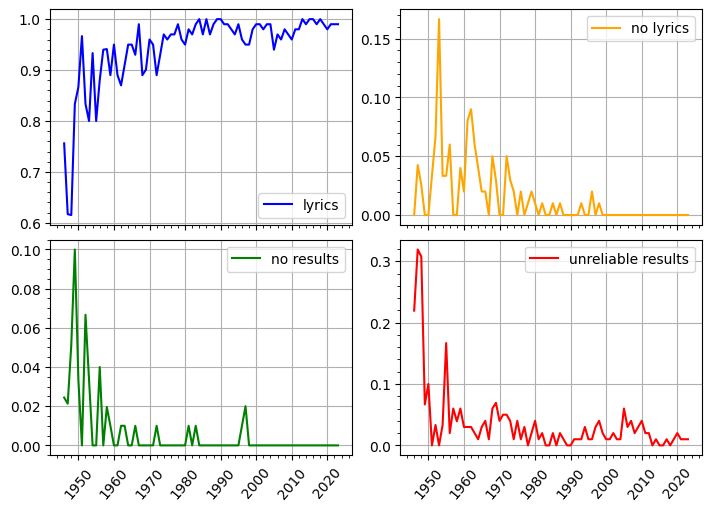

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex=True, layout="constrained")

axs[0][0].plot(df_ratios["lyrics"], label="lyrics", color="blue")
axs[0][0].legend()
axs[0][0].set_xticks(np.arange(1950, 2024, 10))
axs[0][0].tick_params(axis="x", rotation=50)
axs[0][0].minorticks_on()
axs[0][0].grid()

axs[0][1].plot(df_ratios["no_lyrics"], label="no lyrics", color="orange")
axs[0][1].legend()
axs[0][1].set_xticks(np.arange(1950, 2024, 10))
axs[0][1].tick_params(axis="x", rotation=50)
axs[0][1].minorticks_on()
axs[0][1].grid()

axs[1][0].plot(df_ratios["no_results"], label="no results", color="green")
axs[1][0].legend()
axs[1][0].set_xticks(np.arange(1950, 2024, 10))
axs[1][0].tick_params(axis="x", rotation=50)
axs[1][0].minorticks_on()
axs[1][0].grid()

axs[1][1].plot(df_ratios["unreliable_results"], label="unreliable results", color="red")
axs[1][1].legend()
axs[1][1].set_xticks(np.arange(1950, 2024, 10))
axs[1][1].tick_params(axis="x", rotation=50)
axs[1][1].minorticks_on()
axs[1][1].grid()

In [11]:
fig.savefig("images/data_basic_info1.png")

In [12]:
# Valid lyrics ratios from 1946 to 1948 are lower than 80%, so data from 1946 to 1948 should not be the object of the analysis.
print([year for year in range(1946, 2024) if df_ratios.loc[year, "lyrics"] >= 0.8])

[1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [13]:
lyrics_len = []
r = len(df)

for i in range(r):
    year = df.iloc[i, 0]
    lyrics = df.iloc[i, 6]
    lyrics_len.append([year, len(lyrics)])

df_lyrics_len = pd.DataFrame(data=lyrics_len, columns=["year", "lyrics_len"])

In [14]:
df_lyrics_len.head()

,year,lyrics_len
0,1946,815
1,1946,691
2,1946,726
3,1946,764
4,1946,877


In [15]:
lyrics_len_ave = []

for i in range(1946, 2024):
    df_tmp = df_lyrics_len.query(f'year == {i}')
    lyrics_len_ave.append(df_tmp["lyrics_len"].mean())

df_lyrics_len_ave = pd.DataFrame(data=lyrics_len_ave, columns=["lyrics_len_ave"], index=[i for i in range(1946, 2024)])

In [16]:
df_lyrics_len_ave.head()

,lyrics_len_ave
1946,628.951220
1947,592.638298
1948,501.897436
1949,679.800000
1950,845.800000


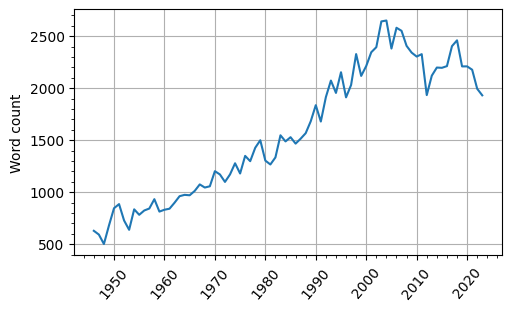

In [17]:
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")

ax.plot(df_lyrics_len_ave["lyrics_len_ave"])
ax.set_ylabel("Word count")
ax.tick_params(axis="x", rotation=50)
ax.minorticks_on()
ax.grid()

In [18]:
fig.savefig("images/data_basic_info2.png")

In [23]:
df_counts = df_counts.set_axis(["total_cnt", "lyrics_cnt", "no_lyrics_cnt", "no_results_cnt", "unreliable_cnt"], axis="columns")

In [25]:
df_ratios = df_ratios.set_axis(["lyrics_ratio", "no_lyrics_ratio", "no_result_ratio", "unreliable_ratio"], axis="columns")

In [28]:
df_data_info = pd.concat([df_counts, df_ratios, df_lyrics_len_ave], axis=1)

In [29]:
df_data_info

,total_cnt,lyrics_cnt,no_lyrics_cnt,no_results_cnt,unreliable_cnt,lyrics_ratio,no_lyrics_ratio,no_result_ratio,unreliable_ratio,lyrics_len_ave
1946,41,31,0,1,9,0.756098,0.000000,0.024390,0.219512,628.951220
1947,47,29,2,1,15,0.617021,0.042553,0.021277,0.319149,592.638298
1948,39,24,1,2,12,0.615385,0.025641,0.051282,0.307692,501.897436
1949,30,25,0,3,2,0.833333,0.000000,0.100000,0.066667,679.800000
1950,30,26,0,1,3,0.866667,0.000000,0.033333,0.100000,845.800000
...,...,...,...,...,...,...,...,...,...,...
2019,100,99,0,0,1,0.990000,0.000000,0.000000,0.010000,2210.340000
2020,100,98,0,0,2,0.980000,0.000000,0.000000,0.020000,2210.530000
2021,100,99,0,0,1,0.990000,0.000000,0.000000,0.010000,2178.400000
2022,100,99,0,0,1,0.990000,0.000000,0.000000,0.010000,1995.010000


In [30]:
df_data_info.to_csv("data/data_info.csv", index=False)